<a href="https://colab.research.google.com/github/sashwinbwaj/LendingClub_EDA/blob/main/LendingClub_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 0. Introduction 
LendingClub is one of America's leading destinations for online personal loans, usually an ideal method to borrow for a special need or credit card debt consolidation. It is well suited for people with responsible payment records and established financial histories.

LendingClub screens potential borrowers and services the loans once they’re approved. The risk: Investors – not LendingClub – make the final decision based on LendingClub grade, utilizing credit and income data. When a person applies online for a loan with LendingClub, there are two types of decisions taken:

1. Accepted: There are 3 further possible scenarios described below based on the final output of the approved loan:

    * Fully paid: Applicant has fully paid the loan (the principal and the interest rate)

    * Current: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. 

    * Charged-off: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan

2. Rejected: Since the loan was rejected, there isn't a rich source of transactional, spending & behavioral patterns for these requests. 

### Business Objectives:  
In a finance industry, one of the main applications of data is to minimize without losing out on possible revenue. In this optimization exercise, the idea is to predict the customer risk i.e whether he will completely repay the loan with interest. If he doesn't, it is a financial risk for the lending party. 

Objective is to identify the risky loan applicants at the time of loan application so that such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.

### Assumptions:  
In a lending institution, customers who default but end up making delayed payments serve as a source of revenue owing to the late payment & interest collected. These delinquent customers can be targeted using collection campaigns to recover the outstanding amounts. 
Therefore, n this exploratory analysis, we will glean patterns from the data to understand the characterstics of customers who have remained delinquent for a longer time & thus were charged off.

### 1. Loading relevent libraries & data

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.style as style 

from IPython.display import HTML, display

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
accepted_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/accepted_2007_to_2018Q4.csv', encoding = "ISO-8859-1")
print(f'\n Accepted data shape : {accepted_data.shape}')
accepted_data.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)



 Accepted data shape : (2260701, 151)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,4421.723917,4421.72,3600.00,821.72,0.0,0.0,0.0,Jan-2019,122.67,NaN,Mar-2019,564.0,560.0,0.0,30.0,1.0,Individual,NaN,NaN,NaN,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,25679.660000,25679.66,24700.00,979.66,0.0,0.0,0.0,Jun-2016,926.35,NaN,Mar-2019,699.0,695.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,NaN,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,NaN,NaN,NaN,NaN,NaN,N

In [4]:
accepted_data.loan_status.value_counts()

Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
Name: loan_status, dtype: int64

Since we are trying to ascertain traits for customers who serve as loss for the institution in the long run, it makes sense to drop customers who are currently in the process such as Current/Late/Default/In Grace Period. So, our problem statement is now simplified to understanding features that differentiates customers who have fully paid off from the ones who were charged off.

In [5]:
accepted_data['loan_status'] = np.where(accepted_data.loan_status == 'Does not meet the credit policy. Status:Fully Paid', 
                                        'Fully Paid', accepted_data.loan_status)
accepted_data['loan_status'] = np.where(accepted_data.loan_status == 'Does not meet the credit policy. Status:Charged Off', 
                                        'Charged Off', accepted_data.loan_status)
accepted_data = accepted_data[accepted_data.loan_status.isin(['Fully Paid', 'Charged Off'])]

In [6]:
accepted_data.loan_status.value_counts()

Fully Paid     1078739
Charged Off     269320
Name: loan_status, dtype: int64

### 2. Cleaning Accepted Data

* In this scenario, there are majorly three major types of features:
  * Loan identifying data such as ID, URL, term, installments, rate, status, description, purpose, amount repaid, next installment date etc
  * Customer identifying data such as address, location, inquiries, public records, income, debt-to-income ratio, credit age
  * Credit data such as delinquent history, spending patterns, active lines, credit scores, revolving balance, utilization etc

* Some variables from the first group such as ID, URL & payment date cannot be used to infer actionable insights regarding overall customer risk. So we will focus less on those. Further, transactional & past delinquency trends of a customer tends to act like good risk indicators for borrowers.

In [7]:
descriptions = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/LoanStats.csv', delimiter = ';', names = ['Colname', 'Description'])
meta_dict = pd.DataFrame(accepted_data.columns.to_list(), columns = ['Colname'])
for idx, cols in enumerate(meta_dict.Colname):
      if cols in descriptions.Colname.to_list():
        meta_dict.loc[idx, 'Found'] = True
        meta_dict.loc[idx, 'Description'] = descriptions[descriptions.Colname == cols]['Description'].values
        meta_dict.loc[idx, 'Missing_%'] = round(100*accepted_data[cols].isna().sum()/accepted_data.shape[0],2)
        meta_dict.loc[idx, 'Levels'] = accepted_data[cols].nunique()
        meta_dict.loc[idx, 'Datatype'] = accepted_data[cols].dtype

#### 2.1 Low-hit rate columns 

1. There are more than 150 features in this data, but a lot of them have very low hit rates. So, we will remove those columns whose missing values are more than 90%.  
2. There are certain features in this data for which it is tough to drive actionability. For example, URL, loan title etc.   
3. Further, there are other variables which systematically differs for customers who fully paid vs customers who were charged off because they are a result of the final status, rather than indicators for them. For example, variables like amount charged off, total interest received, recoveries are not available at the time of decision, so we will not use them for our analysis.
4. Finally, there are around 20 variables with missing values more than 50%. Now, there are three possible reasons for missing values in our data

  * Missing completely at random: The missing values in the data is completely random in nature, possibly due to non-capture of certain points.
  * Missing at random (Conditionally missing) : Here, the missing data is not dependant on the column, but instead on certain characterstics of the segment it belongs to.
  * Systematically missing: Missing values can occur due to systematic relationship with the unobserved value itself.

  In a Fintech scenario, especially working with bureau data, we can come across values missing at random or systematically missing. For example, the variable 'Months since last bankcard delinquency' can either have missing values because it was not available with the bureau or because the customer did not default with the bankcard ever.
Since we do not have more context around these values, I will drop them from our analysis at this point. 


In [8]:
# Removing columns with more than 90% missing values
columns_to_keep = meta_dict.loc[meta_dict['Missing_%'] <= 50].Colname.to_list()
columns_to_drop = ['url', 'title', 'zip_code', 'debt_settlement_flag', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
                   'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
                   'last_fico_range_high', 'last_fico_range_low', 'emp_title']

In [9]:
accepted_data_new = accepted_data[columns_to_keep]
accepted_data_new = accepted_data_new.drop(columns_to_drop, axis = 1)
accepted_data_new.shape

(1348059, 73)

#### 2.2 Format verification
Let's look at some default categorical variables first, after which we will check numerical variables with low unique levels to verify if they are specified correctly. 

In [10]:
accepted_data_new.select_dtypes(include = ['object']).head()

,id,term,grade,sub_grade,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,earliest_cr_line,initial_list_status,application_type,hardship_flag,disbursement_method
0,68407277,36 months,C,C4,10+ years,MORTGAGE,Not Verified,Dec-2015,Fully Paid,n,debt_consolidation,PA,Aug-2003,w,Individual,N,Cash
1,68355089,36 months,C,C1,10+ years,MORTGAGE,Not Verified,Dec-2015,Fully Paid,n,small_business,SD,Dec-1999,w,Individual,N,Cash
2,68341763,60 months,B,B4,10+ years,MORTGAGE,Not Verified,Dec-2015,Fully Paid,n,home_improvement,IL,Aug-2000,w,Joint App,N,Cash
4,68476807,60 months,F,F1,3 years,MORTGAGE,Source Verified,Dec-2015,Fully Paid,n,major_purchase,PA,Jun-1998,w,Individual,N,Cash
5,68426831,36 months,C,C3,4 years,RENT,Source Verified,Dec-2015,Fully Paid,n,debt_consolidation,GA,Oct-1987,w,Individual,N,Cash


In [11]:
for cols in accepted_data_new.select_dtypes(include = ['object']).columns.to_list():
  print(f'{cols: <25}: {accepted_data_new[cols].nunique()}')

id                       : 1348059
term                     : 2
grade                    : 7
sub_grade                : 35
emp_length               : 11
home_ownership           : 6
verification_status      : 3
issue_d                  : 139
loan_status              : 2
pymnt_plan               : 1
purpose                  : 14
addr_state               : 51
earliest_cr_line         : 739
initial_list_status      : 2
application_type         : 2
hardship_flag            : 1
disbursement_method      : 2


In [12]:
for cols in ['term', 'grade', 'emp_length', 'verification_status', 'home_ownership', 'initial_list_status', 'application_type', 'disbursement_method']:
   print(f'\nUnique levels for {cols}')
   print(accepted_data_new[cols].unique())


Unique levels for term
[' 36 months' ' 60 months']

Unique levels for grade
['C' 'B' 'F' 'A' 'E' 'D' 'G']

Unique levels for emp_length
['10+ years' '3 years' '4 years' '6 years' '7 years' '8 years' '2 years'
 '5 years' '9 years' '< 1 year' '1 year' nan]

Unique levels for verification_status
['Not Verified' 'Source Verified' 'Verified']

Unique levels for home_ownership
['MORTGAGE' 'RENT' 'OWN' 'ANY' 'NONE' 'OTHER']

Unique levels for initial_list_status
['w' 'f']

Unique levels for application_type
['Individual' 'Joint App']

Unique levels for disbursement_method
['Cash' 'DirectPay']


In [13]:
print(f'{"Column Name": <25} {"Description": <75} {"Levels"}\n')
for cols in accepted_data_new.select_dtypes(exclude = ['object']).columns.to_list():
  if accepted_data_new[cols].nunique() < 15:
    print(f'{cols: <25}: {str(meta_dict[meta_dict.Colname == cols].Description.values[0]) : <75} {accepted_data_new[cols].unique()}')

Column Name               Description                                                                 Levels

policy_code              : publicly available policy_code=1                                            [1.]
acc_now_delinq           : The number of accounts on which the borrower is now delinquent.             [ 0.  1.  2.  4.  3.  5.  6. 14. nan]
chargeoff_within_12_mths : Number of charge-offs within 12 months                                      [ 0.  1.  2.  3.  6.  7.  4.  5.  9. 10.  8. nan]
num_tl_120dpd_2m         : Number of accounts currently 120 days past due (updated in past 2 months)   [ 0. nan  1.  2.  6.  3.  4.]
num_tl_30dpd             : Number of accounts currently 30 days past due (updated in past 2 months)    [ 0.  1.  2.  4.  3. nan]
pub_rec_bankruptcies     : Number of public record bankruptcies                                        [ 0.  1.  2.  3.  8.  4.  6.  5.  7.  9. 11. 12. nan]


**Observations**:  
1. Time variables like *earliest_cr_line* & *issue_d* are defined as object class, so we will convert them to datetime format.
2. We will convert employment length to a numerical format, as per the meta dictionary.  
3. Although in the risk context, we do not know if the equal intervals in variables such as number of accounts past due correspond to equal change in risk, but we will keep them as numerical features since we can assume that risk increases/decreases monotonically across the levels in these features.
4. Policy code, Hardship Flag & Payment plan has only one value of n across all rows, so we will remove them from our data.
5. Some numerical variables have extra decimals, so we will format them.

In [14]:
# Removing categorical columns with single level
accepted_data_new = accepted_data_new.drop(['policy_code', 'pymnt_plan'], axis = 1)

# Converting dates to datetime format
from datetime import datetime
accepted_data_new.issue_d = accepted_data_new.issue_d.apply(lambda x: datetime.strptime(x,'%b-%Y'))
accepted_data_new = accepted_data_new.dropna(subset=['earliest_cr_line'])
accepted_data_new.earliest_cr_line = accepted_data_new.earliest_cr_line.apply(lambda x: datetime.strptime(x,'%b-%Y'))

# Converting employment variable
emp_length_dict = {
    '< 1 year' : 0, '1 year' : 1, '2 years' : 2, '3 years' : 3, '4 years' : 4, '5 years' : 5, 
    '6 years' : 6, '7 years' : 7, '8 years' : 8,'9 years' : 9, '10+ years' : 10
}

accepted_data_new = accepted_data_new.replace({"emp_length": emp_length_dict })
 
# Defining a target variable for statistical analysis purposes
accepted_data_new['target'] = np.where(accepted_data_new.loan_status == 'Fully Paid', 0, 1)

In [15]:
accepted_data_new.sample()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,target
1316503,12636064,6000.0,6000.0,6000.0,36 months,7.62,186.97,A,A3,10.0,OWN,37000.0,Not Verified,2014-03-01,Fully Paid,debt_consolidation,MI,14.56,0.0,1982-03-01,700.0,704.0,0.0,9.0,0.0,3551.0,18.9,18.0,w,0.0,Individual,0.0,0.0,12696.0,3.0,1411.0,11219.0,23.2,0.0,0.0,129.0,384.0,4.0,4.0,0.0,4.0,NaN,0.0,4.0,5.0,5.0,6.0,7.0,8.0,11.0,5.0,9.0,0.0,0.0,0.0,3.0,100.0,20.0,0.0,0.0,37565.0,12696.0,14600.0,18765.0,N,Cash,0


#### 2.3 Missing value & duplicates treatment 

In [16]:
column_list = accepted_data_new.columns.to_list()
meta_dict_new = meta_dict[meta_dict.Colname.isin(column_list)]
meta_dict_new[meta_dict_new['Missing_%'] > 0].sort_values(by = 'Missing_%', ascending = False)

,Colname,Found,Description,Missing_%,Levels,Datatype
91,mths_since_recent_inq,True,Months since most recent inquiry.,13.12,26.0,float64
103,num_tl_120dpd_2m,True,Number of accounts currently 120 days past due...,8.91,6.0,float64
84,mo_sin_old_il_acct,True,Months since oldest bank installment account o...,8.04,522.0,float64
11,emp_length,True,Employment length in years. Possible values ar...,5.83,11.0,object
107,pct_tl_nvr_dlq,True,Percent of trades never delinquent,5.22,631.0,float64
111,tot_hi_cred_lim,True,Total high credit/credit limit,5.21,427440.0,float64
106,num_tl_op_past_12m,True,Number of accounts opened in past 12 months,5.21,32.0,float64
105,num_tl_90g_dpd_24m,True,Number of accounts 90 or more days past due in...,5.21,29.0,float64
104,num_tl_30dpd,True,Number of accounts currently 30 days past due ...,5.21,5.0,float64
101,num_rev_tl_bal_gt_0,True,Number of revolving trades with balance >0,5.21,46.0,float64


In [17]:
print(f'Number of observations before removing duplicates : {accepted_data_new.shape[0]}')
accepted_data_new = accepted_data_new.drop_duplicates()
print(f'Number of observations before after duplicates : {accepted_data_new.shape[0]}')
missing_values = accepted_data_new[accepted_data_new.isna().any(axis = 1)]
print(f'Number of observations with atleast one missing feature : {missing_values.shape[0]}')

Number of observations before removing duplicates : 1348030
Number of observations before after duplicates : 1348030
Number of observations with atleast one missing feature : 344144


**Observations**
1. Even though the individual missing rates of all columns are less than 10%, they are not systematic for a particular segment. That is why we notice almost 1/3rd of the dataset with atleast one missing feature. So, instead of dropping them from the analysis, we will impute them with simple methods such as mean, zero, max imputations.
2. There are no duplicates in the data. 

In [18]:
# Mean value imputation for numerical features
for cols in accepted_data_new.select_dtypes(exclude = ['object', 'datetime64[ns]']).columns.to_list():
  accepted_data_new[cols] = accepted_data_new[cols].fillna(np.round(accepted_data_new[cols].mean()))
# Mode value imputation for categorical features
for cols in accepted_data_new.select_dtypes(include = ['object', 'datetime64[ns]']).columns.to_list():
  accepted_data_new[cols] = accepted_data_new[cols].fillna(accepted_data_new[cols].mode()[0])
missing_values = accepted_data_new[accepted_data_new.isna().any(axis = 1)]
print(f'Number of observations with atleast one missing feature : {missing_values.shape[0]}')
accepted_data_new['emp_length'] = accepted_data_new['emp_length'].astype('int')

/usr/local/lib/python3.7/dist-packages/pandas/core/algorithms.py:969: UserWarning: Unable to sort modes: '<' not supported between instances of 'str' and 'int'
  warn(f"Unable to sort modes: {err}")


Number of observations with atleast one missing feature : 0


### 3. EDA Class Definition


In [120]:
class EDA:
  
  def __init__(self, data):
    self.data = data
  
  # defining a function which plots values in a seaborn bar plot
  def show_values(axs, orient="v", space=.01):
      def _single(ax):
          if orient == "v":
              for p in ax.patches:
                  _x = p.get_x() + p.get_width() / 2
                  _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                  value = '{:.2f}'.format(p.get_height())
                  ax.text(_x, _y, value, ha="center") 
          elif orient == "h":
              for p in ax.patches:
                  _x = p.get_x() + p.get_width() + float(space)
                  _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                  value = '{:.2f}'.format(p.get_width())
                  ax.text(_x, _y, value, ha="left")

      if isinstance(axs, np.ndarray):
          for idx, ax in np.ndenumerate(axs):
              _single(ax)
      else:
          _single(axs)

  def show_percentages(axs, orient="v", space=.01):
      def _single(ax):
          if orient == "v":
              for p in ax.patches:
                  _x = p.get_x() + p.get_width() / 2
                  _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                  value = '{:.0%}'.format(p.get_height())
                  ax.text(_x, _y, value, ha="center") 
          elif orient == "h":
              for p in ax.patches:
                  _x = p.get_x() + p.get_width() + float(space)
                  _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                  value = '{:.0%}'.format(p.get_width())
                  ax.text(_x, _y, value, ha="left")

      if isinstance(axs, np.ndarray):
          for idx, ax in np.ndenumerate(axs):
              _single(ax)
      else:
          _single(axs)

  def centering():
    display(HTML("""
    <style>
    #output-body {
        display: flex;
        align-items: center;
        justify-content: center;
    }
    </style>
    """))
  
  # Function to represent the correlation of independent variables with the target variable
  def plot_correlations(data, target = 'target', method = 'pearson', n = 20):
    EDA.centering()       
    correlations = data.corr(method = method)[target]
    top_correlations = correlations.sort_values(ascending = False)[1:21]
    fig, ax1 = plt.subplots(figsize=(n,10))
    ax1.set_title('Correlations:', fontsize = 15)
    ax1 = sns.barplot(y = top_correlations.index,  x = top_correlations.values, palette = ('Blues_d'), alpha = 0.7)
    ax1.set_xlabel('Correlations', fontsize = 15)
    ax1.set_ylabel('Features', fontsize = 15)
    EDA.show_values(ax1, "h", space=0)
    plt.show()

  def plot_numerical(var, var_label, data = accepted_data_new, target = 'loan_status'):
    style.use('seaborn')
    sns.set_context('paper')

    EDA.centering()
    fig, ax = plt.subplots(figsize = (20,6))
    plt.subplot(1,3,2)
    ax1 = sns.kdeplot(data = data, x = var, hue = target, shade=True, alpha=.5)
    ax1.set_title('Distribution : Across Loan Status', fontsize = 15)
    ax1.set_xlabel(var_label)
    
    plt.subplot(1,3,1)
    ax1 = sns.distplot(data[var])
    ax1.set_title('Distribution of ' + var_label, fontsize = 15)
    ax1.set_xlabel(var_label)

    plt.subplot(1,3,3)
    ax2 = sns.boxplot(data = accepted_data_new, x = 'int_rate', y = "loan_status")
    ax2.set_title('Boxplot of ' + var_label + ': By Loan Status', fontsize = 15)
    ax2.set_xlabel(var_label)
    ax2.set_ylabel('Loan Status')

    plt.show()

  def plot_categorical(var, var_label, data = accepted_data_new, target = 'target'):
    style.use('seaborn')
    sns.set_context('paper')
    
    EDA.centering()
    count_summary = data[var].value_counts()/data.shape[0]
    mean_summary = data.groupby(data[var]).mean().reset_index()[[var, target]]
    fig, ax = plt.subplots(figsize = (18, 6))
    plt.subplot(1,2,1)
    ax1 = sns.barplot(y= count_summary.index, x= count_summary.values, orient = 'h', order=count_summary.sort_values(ascending = False).index, palette = ('flare'))
    ax1.set_title('Loan Distribution : Across ' + var_label, fontsize = 15)
    ax1.set_xlabel('Distribution %')
    ax1.set_ylabel(var_label)
    plt.yticks(fontsize = 12)
    EDA.show_percentages(ax1, "h", space=0)

    plt.subplot(1,2,2)
    avg_loss = np.mean(data.target)
    ax2 = sns.barplot(data = mean_summary, y = var, x = target, orient = 'h', order=count_summary.sort_values(ascending = False).index , palette = ('mako'))
    ax2.set_title('Loss % : Across ' + var_label, fontsize = 15)
    ax2.set_xlabel('Loss %')
    ax2.set_ylabel('')
    plt.yticks(fontsize = 12)
    EDA.show_percentages(ax2, "h", space=0)
    plt.axvline(x=avg_loss, color='r', linestyle='--', label = 'Avg Loss %')
    plt.legend(loc = 'best')
    plt.tight_layout()
    plt.show()

  def twin_plot(var, var_label, data = accepted_data_new, target = 'target', pal = 'mako'):
    style.use('seaborn')
    sns.set_context('paper')
    
    data[var] = data[var].astype('object')
    count_summary = data[var].value_counts()/data.shape[0]
    mean_summary = data.groupby(data[var]).mean().reset_index()[[var, target]]

    width = max(data[var].nunique()*1.5,8)
    height = max(width*0.5,6)
    EDA.centering()
    fig, ax = plt.subplots(figsize = (width,height))
    ax1 = sns.barplot(x= count_summary.index, y= count_summary.values, palette = (pal), label = 'Distributon %')
    ax1.set_title('Distribution & Loss % : By ' + var_label, fontsize = 15)
    ax1.set_ylabel('Distribution %')
    ax1.set_xlabel(var_label, fontsize = 12)
    plt.xticks(fontsize = 12, rotation = 45)
    ax1.set_xlabel(var_label)
    plt.yticks([])
    EDA.show_percentages(ax1, "v", space=0)

    ax2 = ax1.twinx()
    ax2 = sns.lineplot(data = mean_summary, x = var, y = target, palette = (pal), label = 'Loss %')
    ax2.set_ylabel('Loss %')
    plt.yticks([])
    plt.legend(loc = 'best')

    for x,y in zip(mean_summary[var].values.tolist(),mean_summary[target].values.tolist()):

        label = "{:.0%}".format(y)

        plt.annotate(label, # this is the text
                    (x,y), # these are the coordinates to position the label
                    textcoords="offset points", # how to position the text
                    xytext=(0,5), # distance from text to points (x,y)
                    ha='center') # horizontal alignment can be left, right or center


    plt.show()


  def combo_graph(var, var_label, data = accepted_data_new, target = 'target', pal = 'Blues_d', order = ' '):
    sns.set_style('dark')

    count_summary = pd.DataFrame(data[var].value_counts()/data.shape[0]).reset_index()
    count_summary.columns = ['index', 'values']
    count_summary['Type'] = 'Distribution %'

    avg_loss = np.mean(data.target)
    mean_summary = data.groupby(data[var]).mean().reset_index()[[var, target]]
    mean_summary.columns = ['index', 'values']
    mean_summary['Type'] = 'Loss %'

    result = pd.concat([count_summary, mean_summary])
    result['index'] = result['index'].astype('object')
    
    width = max(8,data[var].nunique()*1.5)
    height = max(width*0.5,6)
    EDA.centering()
    fig, ax = plt.subplots(figsize = (width,height))
    if order == ' ':
      ax1 = sns.barplot(data = result, x= 'index', y= 'values', hue = 'Type', palette = pal)
    else:
      ax1 = sns.barplot(data = result, x= 'index', y= 'values', hue = 'Type', palette = pal, order = order)
    ax1.set_title('Distribution & Loss % : By ' + var_label, fontsize = 15)
    plt.axhline(y=avg_loss, color='r', linestyle='--', label = 'Avg Loss %')
    ax1.set_ylabel('Percentage (Distribution / Loss)')
    ax1.set_xlabel(var_label, fontsize = 12)
    plt.xticks(fontsize = 12, rotation = 45)
    ax1.set_xlabel(var_label)
    #plt.yticks([])
    plt.legend(loc = 'best')
    EDA.show_percentages(ax1, "v", space=0)
    plt.show()

  def scatter_boxplots(data, scatter_x, box_x, y):
    sns.set_context("paper", rc={"font.size":8,"axes.titlesize":15,"axes.labelsize":12}) 

    EDA.centering()
    fig, ax = plt.subplots(figsize = (20,8))
    ax1 = plt.subplot(1,2,1)
    ax1.set_title('Scatter Plot', fontsize = 15)
    ax1 =  sns.scatterplot(x = scatter_x, y=y, data = data, palette = 'Blues')
    
    ax2 = plt.subplot(1,2,2)
    ax2 = sns.boxplot(x= box_x, y = y, data = data, palette = 'Blues')
    ax2.set_title('Box Plot', fontsize = 15)
    plt.show()

### 4. Exploratory Data Analysis

#### 4.1 Highly correlated features

Since we have over 70 numerical features to work out, we will start by plotting their correlations with the final loan status feature. This will represent a list of variables that we will explore over the course of this analysis.   

I have initially started with the pearson correlation method. It is simple & intuitive, but it captures the linear relationship between variables & assumes normality of distributions. A better alternative is to use the spearman coefficient. I have plotted the top 15 variables below based on their correlations. 

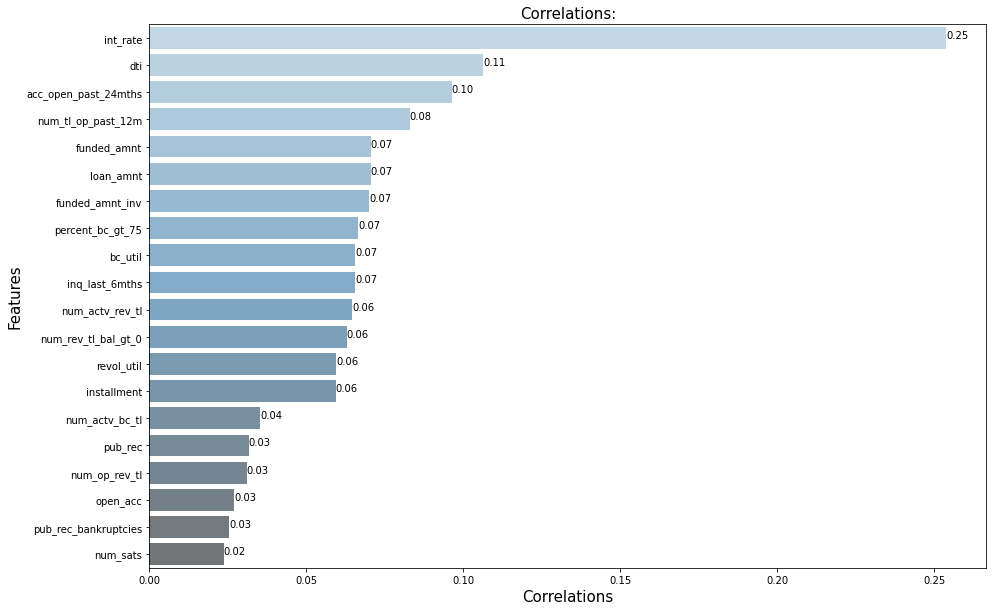

In [20]:
EDA.plot_correlations(accepted_data_new, method = 'spearman', n = 15)

#### 4.2 Interest Rate


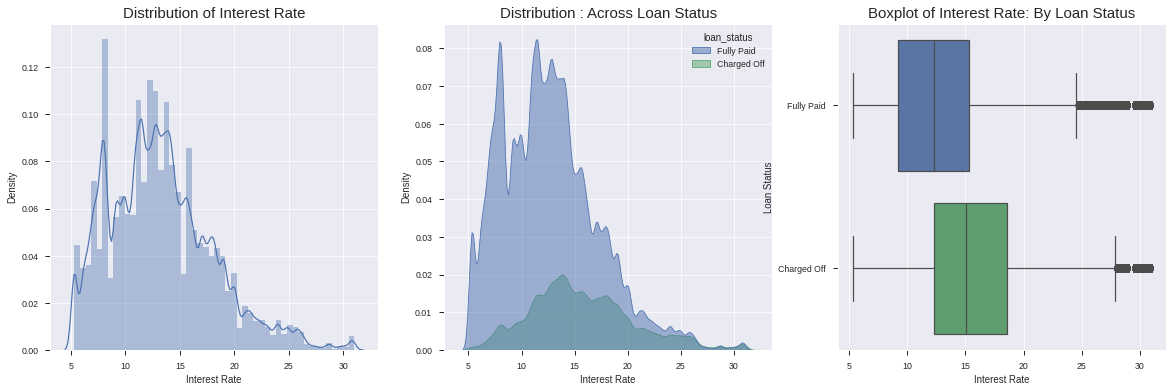

In [21]:
EDA.plot_numerical(data = accepted_data_new, var = 'int_rate', var_label = 'Interest Rate')

**Observations**  
* We notice that interest rates are right-skewed with a significant proportion of customers with interest rates less than 15%. 
* The density plot shows a considerable difference in distribution of interest rates between customers who fully paid & those who were charged off. This is further cemented by the difference in boxplots, where we notice that customers who were charged off had higher interest rates.  

**Zing!** However, it is tough to infer that high interest rates is causing customers to default since there is a possibility of reverse causality. Lending Club is highly to provide high interest rates for 'risky' customers, so we will wait before commenting on this.

#### 4.3 Purpose of Loan
Next, we look at both the proportion of our segments contributing to the Lending Club portfolio (first graph on the left) as well as the loss rate (defined as the % of customers in the segment who were charged off).   The first variable considered below is the purpose of loan as reported by the applicant. 
The vertical line in the second graph below represents the average loss rate in the entire portfolio.

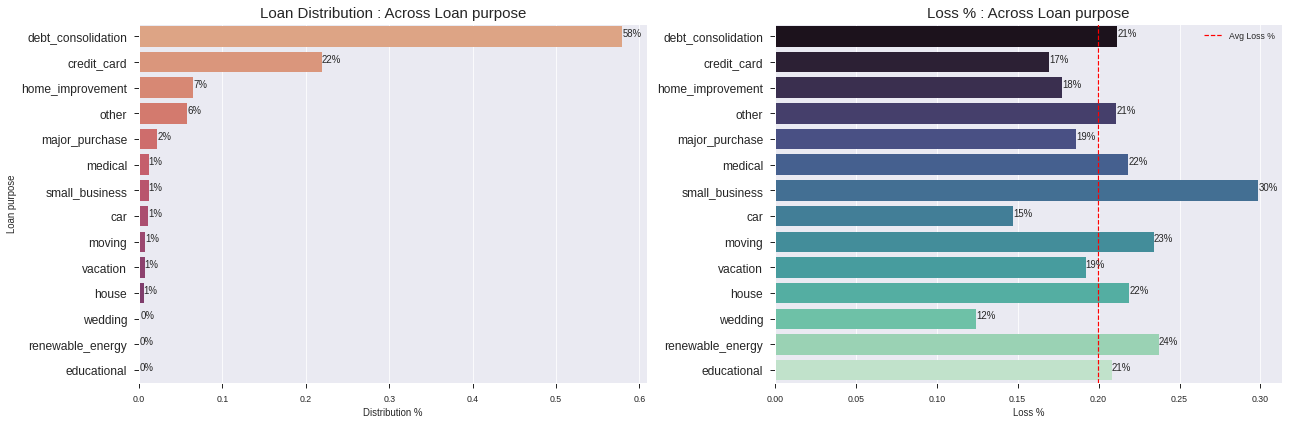

In [22]:
EDA.plot_categorical(data = accepted_data_new, var = 'purpose', var_label = 'Loan purpose')

**Observations**  
* Debt consolidation is the most common reason cited by applicants to apply for loan. 
* The highest risk emanates from customer who got the loan for running small businesses. However, this contributes to only 1% of loans approved, so Lending Club should be concerned if the proportion of small business loans increases in the future portfolio.  

#### 4.3 DTI
DTI is defined as the ratio of the applicant's total debt (excluding the LC loan) to the self-reported income. So, intuitively we expect that customers with higher DTI have larger financial burden, thus representing higher risk associated. 

In [23]:
accepted_data_new.dti.quantile([0, 0.01, 0.05, 0.5, 0.95,0.99,1])

0.00     -1.00
0.01      1.77
0.05      4.97
0.50     17.61
0.95     32.98
0.99     38.46
1.00    999.00
Name: dti, dtype: float64

We have extreme outliers on each end of DTI, likely arising from data capture issues. To aid in visualization, we will cap them at 1% and 99% percentiles.

In [24]:
percentiles = accepted_data_new.dti.quantile([0.01, 0.99]).values
accepted_data_new['dti'] = np.clip(accepted_data_new['dti'], percentiles[0], percentiles[1])

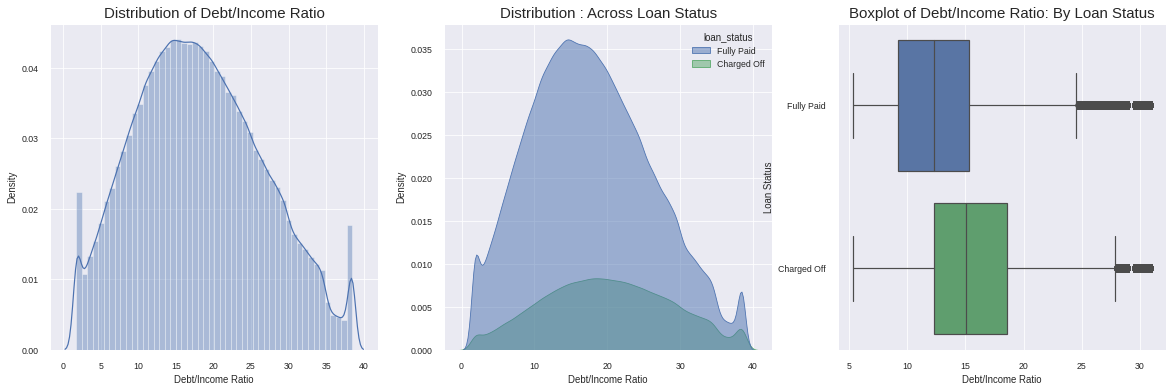

In [91]:
EDA.plot_numerical(var = 'dti', var_label = 'Debt/Income Ratio')

**Observations**
* DTI density plot resembles almost a normal distribution centered at ~17. Even at this rate, the LC customers have heavy existing debt burden even before applying for the loan.
* As expected, there is a clear distinction in DTI; customers who fully paid their LC loan had a much lower debt to income ratio as compared to the ones who were charged off. 

#### 4.4 Loan Amount

In [26]:
accepted_data_new.loan_amnt.quantile([0, 0.01, 0.05, 0.5, 0.95,0.99,1])

0.00      500.0
0.01     1500.0
0.05     3200.0
0.50    12000.0
0.95    32850.0
0.99    35000.0
1.00    40000.0
Name: loan_amnt, dtype: float64

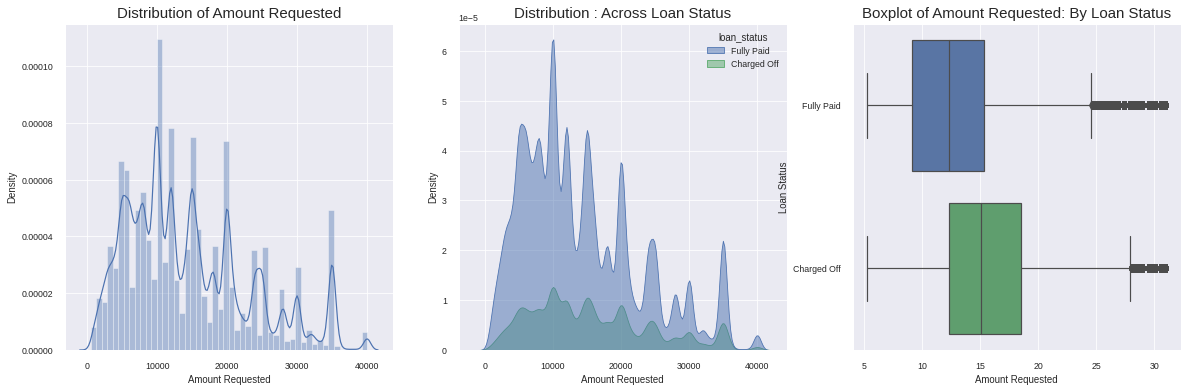

In [92]:
EDA.plot_numerical(var = 'loan_amnt', var_label = 'Amount Requested')

Amount is right skewed with multiple small peaks. However, most of the loans requested lie between 5k-20k dollars. We will use intervals of 5k to double-click on this. 

In [84]:
temp = accepted_data_new[['loan_amnt', 'target', 'loan_status']]
labels = [str(x)+'-'+str(x+5)+'k' for x in range (0, 40, 5)]
temp['cut'] = pd.cut(temp['loan_amnt'], [x for x in range(0, 41000, 5000)], labels=labels)

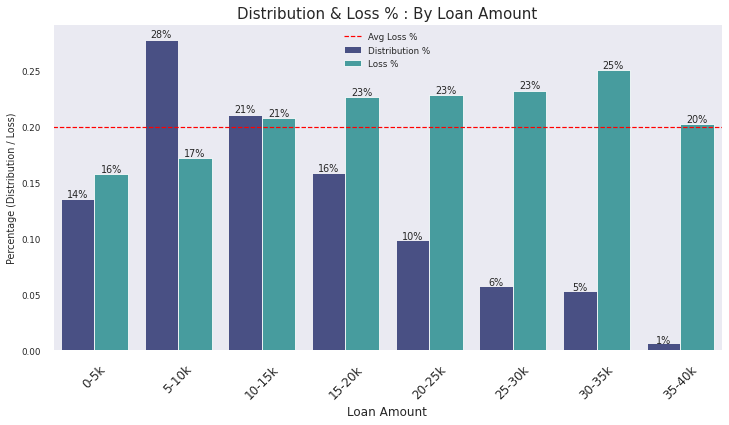

In [85]:
EDA.combo_graph('cut', 'Loan Amount', data = temp, pal = 'mako', order = labels)

**Observations**  
* Around 80% of the loan amounts are less than 20k, with a very small proportion exists with more than 35k in the portfolio.
* The risk progressively increases as the loan amount increases, with all segments greater than 20k have more than average loss rates. 

#### 4.5 Number of open trade lines (Last 24 months)
We will look at how the existing number of open trade lines with the customer impact their possibilities of defaulting. On one hand, customers with existing trade lines are representative of credit awareness, so we might see a trend of decreasing loss rates as the number of open TL increases.  
However, it can also act as a signal of existing financial burden as well, which tends to act opposite to the initial intuition above.

In [87]:
accepted_data_new.acc_open_past_24mths.quantile([0, 0.01, 0.05, 0.5, 0.95,0.99,1])

0.00     0.0
0.01     0.0
0.05     1.0
0.50     4.0
0.95    10.0
0.99    15.0
1.00    64.0
Name: acc_open_past_24mths, dtype: float64

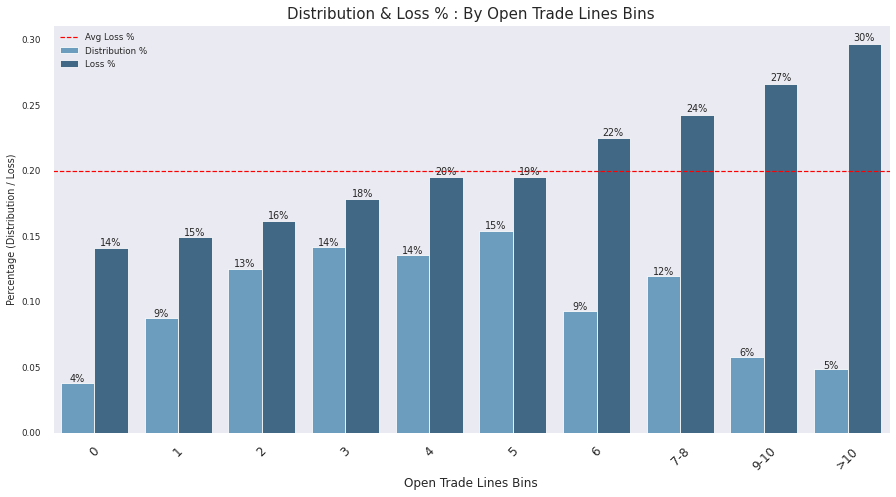

In [93]:
pd.options.mode.chained_assignment = None 
temp = accepted_data_new[['acc_open_past_24mths', 'target', 'loan_status']]
labels = ['0', '1', '2', '3', '4', '5', '6', '7-8', '9-10', '>10']
temp['cut'] = pd.cut(temp['acc_open_past_24mths'], [-1, 0, 1, 2, 3, 4, 5, 6, 8, 10, 100], labels=labels)
EDA.combo_graph(data = temp, var = 'cut', var_label = 'Open Trade Lines Bins', order = labels)

**Observations**  
* More than two-thirds of the portfolio has less than five open trade lines. As the customer lines increase, there is a gradual increase in the risk. Customers with more than 10 open TL have a loss rate of 30%. Lending club should be aware of this. 
* Let us check if number of open TL correspond to existing financial burden. 

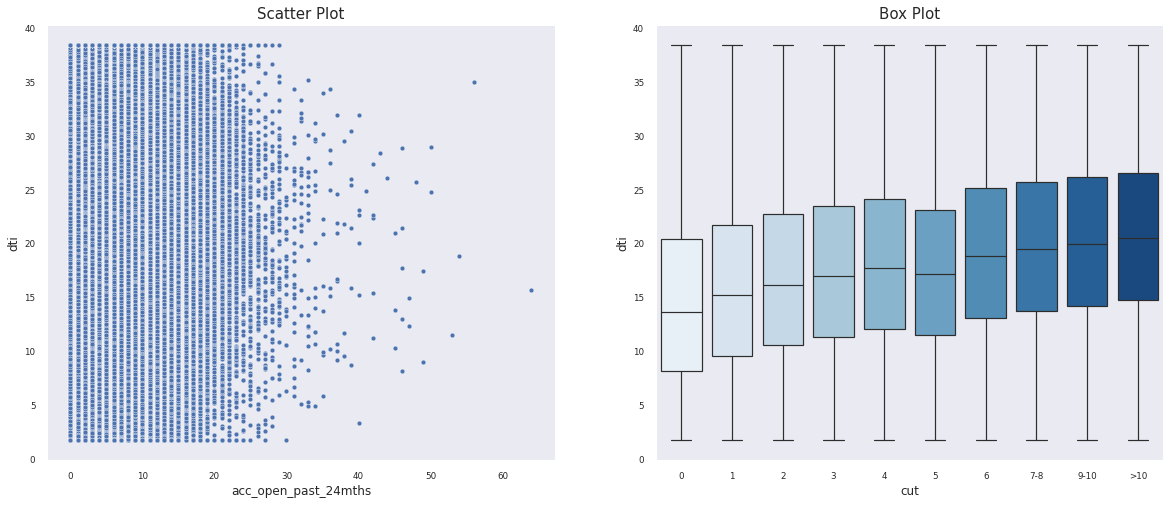

In [121]:
temp['dti'] = accepted_data_new['dti']
EDA.scatter_boxplots(data = temp, scatter_x = 'acc_open_past_24mths', box_x = 'cut', y = 'dti')